In [159]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None) 

In [160]:
# read dataset

train_path = r"C:\Users\nurda\Downloads\eğitim.csv"
test_path = r"C:\Users\nurda\Downloads\test.csv"

dfe = pd.read_csv(train_path)
dft = pd.read_csv(test_path)

print("Train Data:")
print(dfe)

print("\nTest Data:")
print(dft)


Train Data:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...   

In [3]:
#Get information about data

dft.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
dfe.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
dfe.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
dft.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [7]:
dfe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
dft.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
print("eğitim index verisi")
dfe.index


eğitim index verisi


RangeIndex(start=0, stop=891, step=1)

In [12]:
print("test index verisi")
dft.index

test index verisi


RangeIndex(start=0, stop=418, step=1)

In [13]:
dfe.shape

(891, 12)

In [14]:
dft.shape

(418, 11)

In [15]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [18]:
#benzersiz değer var mı 
dfe.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [20]:
#eğitim verisi için
dfe.duplicated(keep=False).sum()

0

In [22]:
#test verisi için 
dft.duplicated(keep=False).sum()

0

In [23]:
#eksik değer var mı?
dfe.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
dfe.isnull().values.any()

True

In [26]:
dft.isnull().values.any()

True

In [27]:
dfe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
dft.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
#eğitim verisinin eksik değerleri 0 ile doldurma
dfe.fillna(0,inplace=True)
dfe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
#test verisinin eksik değerleri 0 ile doldurma
dft.fillna(0,inplace=True)
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [39]:
dfe["Age"].value_counts()

Age
0.00     177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [44]:
#sex ve pclass a göre survived ve fare değişkenin ortalamasını ve toplamını alma
dfe.groupby(["Sex","Pclass"],as_index=False).agg({"Survived":["mean","sum"],
                                         "Fare":"mean" })

Sex Pclass  Survived            Fare
                      mean sum        mean
0  female      1  0.968085  91  106.125798
1  female      2  0.921053  70   21.970121
2  female      3  0.500000  72   16.118810
3    male      1  0.368852  45   67.226127
4    male      2  0.157407  17   19.741782
5    male      3  0.135447  47   12.661633

In [55]:
dfe["Survived"] = dfe["Survived"].astype(int)
#Survived sütununu string'e çevirmek


#dfe["Survived"] = dfe["Survived"].astype()


In [64]:
#sex göre  Survived sütunu için toplama, Embarked sütunu için count işlemi

dfe.groupby(["Sex"],as_index=False).agg({"Survived": "sum", "Embarked": "count"})


,Sex,Survived,Embarked
0,female,233,314
1,male,109,577


In [67]:
#yeni sütun ekleme
dft["age1"]=pd.cut(dft["Age"],bins=3,labels=("genç","orta","yaslı"))
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,orta
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,orta
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,yaslı
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,orta
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,genç
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S,genç
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,orta
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,orta
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S,genç


In [71]:
#yeni sütun bazında gruplama işlemi (survived ,embarked ve fare )
dft.groupby(["age1"],observed=True)["Embarked"].value_counts()

age1   Embarked
genç   S           149
       C            45
       Q            34
orta   S           104
       C            45
       Q            10
yaslı  S            17
       C            12
       Q             2
Name: count, dtype: int64

In [75]:
#yeniden isimlendirme (columns and index )

dft.rename(columns={"age1": "Age1"})

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,orta
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,orta
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,yaslı
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,orta
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,genç
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S,genç
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,orta
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,orta
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S,genç


In [82]:
#Age1 sütunu silme işlemi
dft.drop("age1",axis=1,inplace=True)

In [83]:
dft

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [101]:

dfe.loc[(dfe["Sex"]=="female") & (dfe["Age"]>=30.0)  &
((dfe["Embarked"]=="S" ) | (dfe["Embarked"]=="Q" )),["Survived","Pclass","Sex"]]

,Survived,Pclass,Sex
3,1,1,female
11,1,1,female
15,1,2,female
18,0,3,female
25,1,3,female
...,...,...,...
856,1,1,female
862,1,1,female
865,1,2,female
871,1,1,female


In [93]:
#pivot table oluşturma
dfe.pivot_table("Survived","Sex",["Embarked","Pclass"],aggfunc="sum")

Embarked    0     C               Q                S            
Pclass      1     1    2     3    1    2     3     1     2     3
Sex                                                             
female    2.0  42.0  7.0  15.0  1.0  2.0  24.0  46.0  61.0  33.0
male      NaN  17.0  2.0  10.0  0.0  0.0   3.0  28.0  15.0  34.0

In [105]:
dfe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


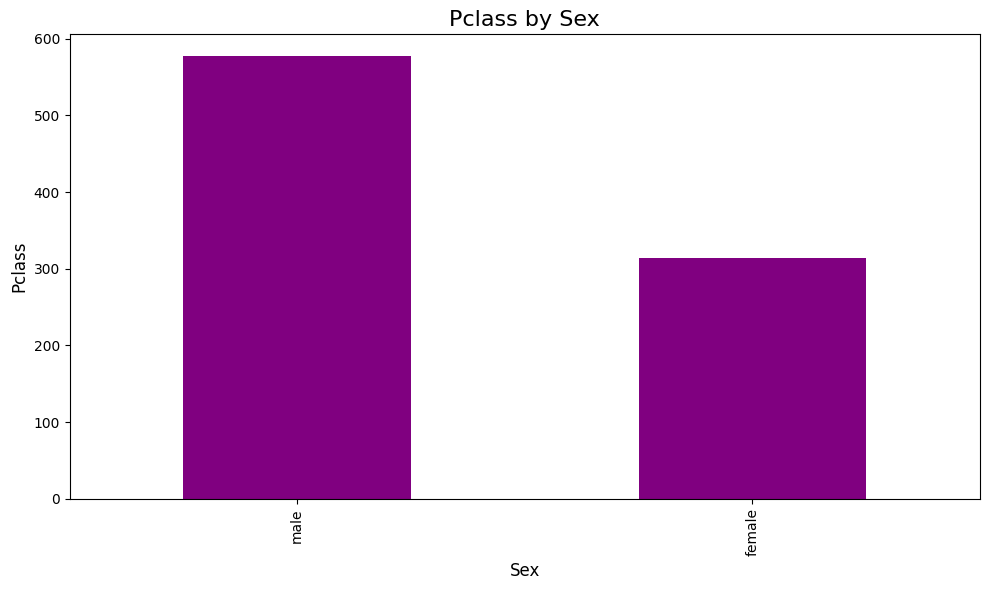

In [110]:

# Sütun grafiği oluştur
plt.figure(figsize=(10, 6))  # Grafik boyutunu belirle
dfe["Sex"].value_counts().plot(kind="bar", color='purple')

# Grafiğe başlık ve eksen adları ekle
plt.title('Pclass by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Pclass', fontsize=12)

# X eksenindeki yazıları döndür (gerektiğinde daha iyi okunması için)
plt.xticks(rotation="vertical")

# Grafiği göster
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

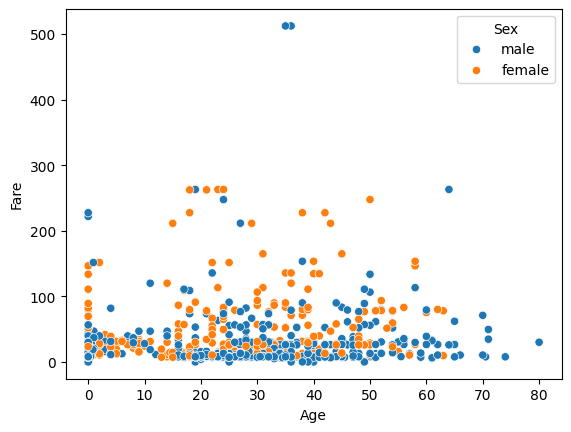

In [117]:
#yaşların fare dağılımı

sns.scatterplot(x=dfe["Age"], y=dfe["Fare"],hue="Sex",data=dfe)


<Axes: >

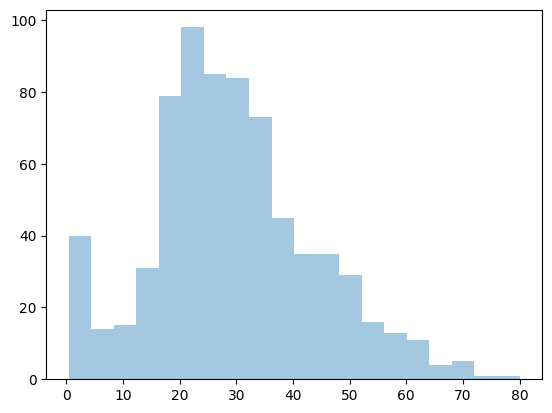

In [161]:
sns.distplot(x=dfe["Age"], kde=False)

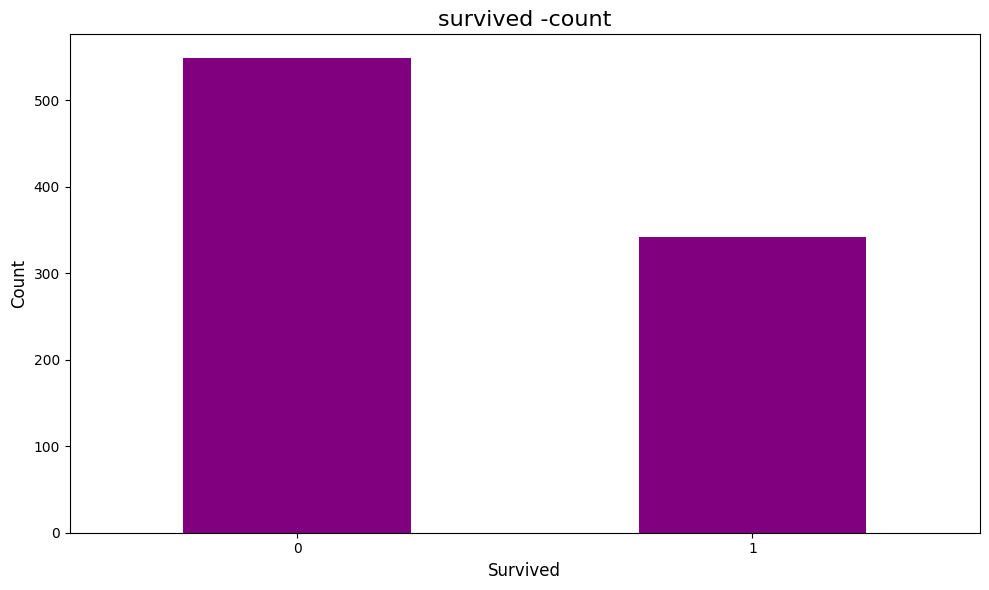

In [128]:
# Sütun grafiği oluştur
plt.figure(figsize=(10, 6))  # Grafik boyutunu belirle
dfe["Survived"].value_counts().plot(kind="bar", color='purple')

# Grafiğe başlık ve eksen adları ekle
plt.title('survived -count', fontsize=16)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

# X eksenindeki yazıları döndür (gerektiğinde daha iyi okunması için)
plt.xticks(rotation=0)

# Grafiği göster
plt.tight_layout()
plt.show()

In [175]:
#sayısal değişken grafiklerini yazma
def hist (değerler) :
    plt.figure(figsize=(9,3))
    plt.hist(dfe[değerler])
    plt.xlabel(değerler)
    plt.ylabel("Frekans")
    plt.title(f"Sayısal Değişken {değerler} ")
    print("değerler,sayı")
    

In [176]:
sayısal=["Survived","Pclass","Fare"]


değerler,sayı
değerler,sayı
değerler,sayı


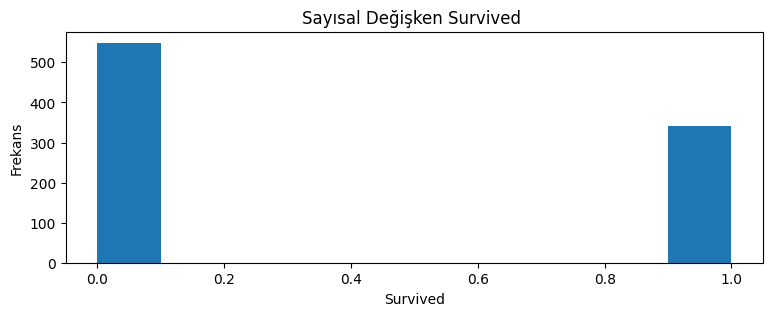

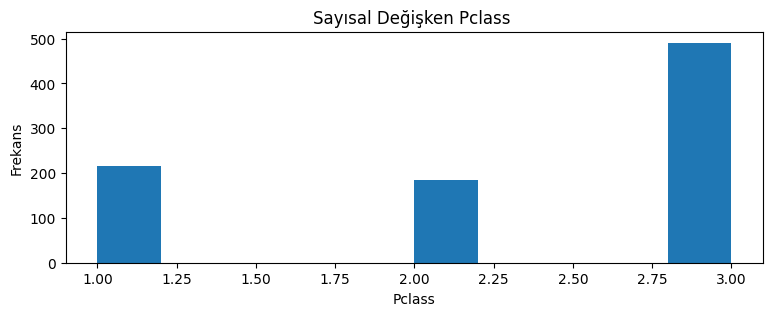

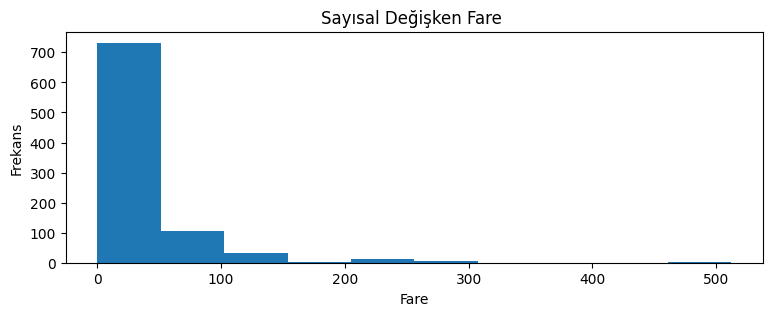

In [177]:
for i in sayısal:
    hist(i)

In [129]:
dfe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


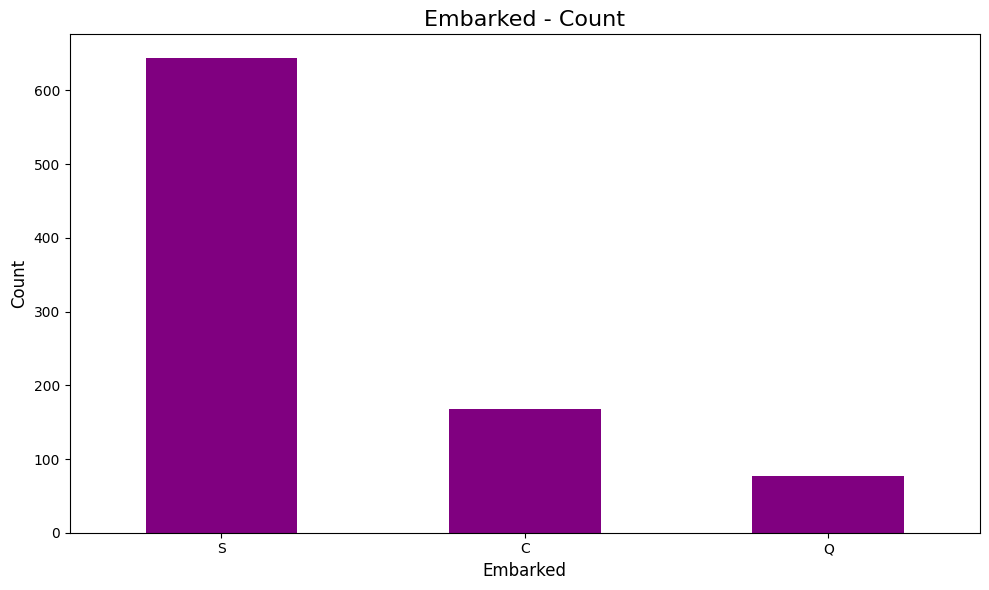

In [163]:
#embarked -count 
plt.figure(figsize=(10, 6))  # Grafik boyutunu belirle
dfe["Embarked"].value_counts().plot(kind="bar", color='purple')

# Grafiğe başlık ve eksen adları ekle
plt.title('Embarked - Count', fontsize=16)
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Count', fontsize=12)

# X eksenindeki yazıları döndür (gerektiğinde daha iyi okunması için)
plt.xticks(rotation=0)

# Grafiği göster
plt.tight_layout()
plt.show()

<Axes: xlabel='Embarked', ylabel='Fare'>

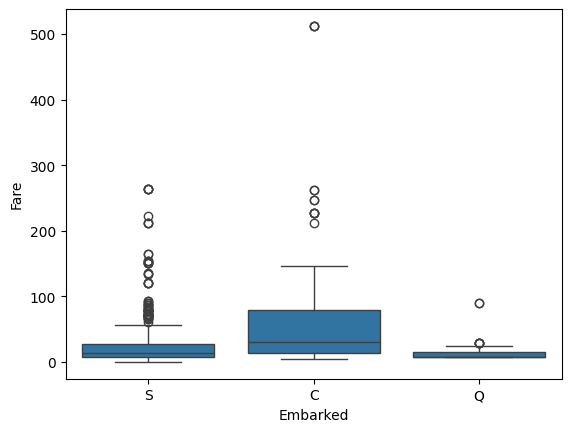

In [182]:
#Embarked and Fare 
sns.boxplot(x= dfe["Embarked"],y=dfe["Fare"])